0. Open
1. Review
2. Topic
    
    2.1 워드 임베딩( Word Embedding )
    
    2.2 Word2Vec
        
        
3. Q & A
4. Next
5. Close

# 글자 단위 RNN( Char RNN )으로 텍스트 생성하기

## 데이터 이해 및 전처리

다 대 일( many-to-one ) 구조 RNN

In [1]:
import numpy as np

from tensorflow.keras.utils import to_categorical

In [2]:
text = '''
I get on with life as a programmer,
I like to contemplate beer.
But when I start to daydream,
My mind turns straight to wine.

Do I love wine more than beer?

I like to use words about beer.
But when I stop my talking,
My mind turns straight to wine.

I hate bugs and errors.
But I just think back to wine,
And I'm happy once again.

I like to hang out with programming and deep learning.
But when left alone,
My mind turns straight to wine.
'''

In [3]:
tokens = text.split()
text = ' '.join( tokens )
print( text )

I get on with life as a programmer, I like to contemplate beer. But when I start to daydream, My mind turns straight to wine. Do I love wine more than beer? I like to use words about beer. But when I stop my talking, My mind turns straight to wine. I hate bugs and errors. But I just think back to wine, And I'm happy once again. I like to hang out with programming and deep learning. But when left alone, My mind turns straight to wine.


In [4]:
char_vocab = sorted( list( set( text ) ) )
print( char_vocab )

[' ', "'", ',', '.', '?', 'A', 'B', 'D', 'I', 'M', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'r', 's', 't', 'u', 'v', 'w', 'y']


In [5]:
vocab_size = len( char_vocab )
print( '글자 집합 크기 : {}'.format( vocab_size ) )

글자 집합 크기 : 33


In [6]:
char_to_index = dict( ( c, i ) for i, c in enumerate( char_vocab ) )
print( char_to_index )

{' ': 0, "'": 1, ',': 2, '.': 3, '?': 4, 'A': 5, 'B': 6, 'D': 7, 'I': 8, 'M': 9, 'a': 10, 'b': 11, 'c': 12, 'd': 13, 'e': 14, 'f': 15, 'g': 16, 'h': 17, 'i': 18, 'j': 19, 'k': 20, 'l': 21, 'm': 22, 'n': 23, 'o': 24, 'p': 25, 'r': 26, 's': 27, 't': 28, 'u': 29, 'v': 30, 'w': 31, 'y': 32}


In [7]:
length = 11
sequences = []
for i in range( length, len( text ) ):
    seq = text[ i - length:i ]
    sequences.append( seq )
print( '총 훈련 샘플 수 : {}'.format( len( sequences ) ) )

총 훈련 샘플 수 : 426


In [8]:
sequences[ :10 ]

['I get on wi',
 ' get on wit',
 'get on with',
 'et on with ',
 't on with l',
 ' on with li',
 'on with lif',
 'n with life',
 ' with life ',
 'with life a']

In [9]:
# 정수 인코딩
X = []
for line in sequences:
    temp_X = [ char_to_index[ char ] for char in line ]
    X.append( temp_X )

In [10]:
# 글자 집합과 예측 글자 분리
sequences = np.array( X )
X = sequences[ :, :-1 ] # 글자 집합
y = sequences[ :, -1 ] # 다음 예측 글자

In [11]:
for line in X[ :5 ]:
    print( line )

[ 8  0 16 14 28  0 24 23  0 31]
[ 0 16 14 28  0 24 23  0 31 18]
[16 14 28  0 24 23  0 31 18 28]
[14 28  0 24 23  0 31 18 28 17]
[28  0 24 23  0 31 18 28 17  0]


In [12]:
sequences = [ to_categorical( x, num_classes = vocab_size ) for x in X ]
X = np.array( sequences )
y = to_categorical( y, num_classes = vocab_size )

In [13]:
X.shape

(426, 10, 33)

## 모델 구성

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [15]:
model = Sequential()

model.add( LSTM( 80, input_shape = ( X.shape[ 1 ], X.shape[ 2 ] ) ) )
model.add( Dense( vocab_size, activation = 'softmax' ) )

In [16]:
model.compile( loss = 'categorical_crossentropy', optimizer = 'adam', metrics = [ 'accuracy' ] )
model.fit( X, y, epochs = 100, verbose = 2 )

Train on 426 samples
Epoch 1/100
426/426 - 2s - loss: 3.4648 - accuracy: 0.0822
Epoch 2/100
426/426 - 0s - loss: 3.3191 - accuracy: 0.1925
Epoch 3/100
426/426 - 0s - loss: 3.0471 - accuracy: 0.1972
Epoch 4/100
426/426 - 0s - loss: 2.9764 - accuracy: 0.1972
Epoch 5/100
426/426 - 0s - loss: 2.9538 - accuracy: 0.1972
Epoch 6/100
426/426 - 0s - loss: 2.9224 - accuracy: 0.1972
Epoch 7/100
426/426 - 0s - loss: 2.8998 - accuracy: 0.1972
Epoch 8/100
426/426 - 0s - loss: 2.8845 - accuracy: 0.1972
Epoch 9/100
426/426 - 0s - loss: 2.8659 - accuracy: 0.1972
Epoch 10/100
426/426 - 0s - loss: 2.8344 - accuracy: 0.1972
Epoch 11/100
426/426 - 0s - loss: 2.7918 - accuracy: 0.1972
Epoch 12/100
426/426 - 0s - loss: 2.7509 - accuracy: 0.1995
Epoch 13/100
426/426 - 0s - loss: 2.7119 - accuracy: 0.2277
Epoch 14/100
426/426 - 0s - loss: 2.6543 - accuracy: 0.2207
Epoch 15/100
426/426 - 0s - loss: 2.6017 - accuracy: 0.2207
Epoch 16/100
426/426 - 0s - loss: 2.5415 - accuracy: 0.2676
Epoch 17/100
426/426 - 0s - 

In [17]:
def sentence_generation( model, char_to_index, seq_length, seed_text, n ):
    init_text = seed_text
    sentence = ''
    for _ in range( n ):
        encoded = [ char_to_index[ char ] for char in seed_text ]
        encoded = pad_sequences( [ encoded ], maxlen = seq_length, padding = 'pre' )
        encoded = to_categorical( encoded, num_classes = len( char_to_index ) )
        result = model.predict_classes( encoded, verbose = 0 )
        for char, index in char_to_index.items():
            if index == result:
                break
        seed_text = seed_text + char
        sentence = sentence + char
    sentence = init_text + sentence
    
    return sentence

In [18]:
print( sentence_generation( model, char_to_index, 10, 'I got on w', 80 ) )

I got on with life as a programmer, I like to hang out with programming and deep learning.


### 워드 임베딩(Word Embedding)

#### 희소 표현(Sparse Representation)

- 하나의 값만 1로 표현하고 나머지는 모두 0으로 표현
- 희소 벡터 ex) 10차원 vector : apple [1 0 0 0 0 0 0 0 0 0]
- 단점
    1. 기억장소 낭비 요인 발생
    2. 단어의 의미 표현이 불가능
    

#### 밀집 표현(Dense Representation)

- 벡터의 차원을 단어 집합의 크기로 정하지 않고 사용자가 설정한 크기로 설정한 후 단어를 표현
- 밀집 벡터(dense vector) : 사용자가 임의로 벡터의 크기를 결정하고 실수로 표현
- 워드 임베딩(word embedding) : 단어를 밀집 벡터의 형태로 표현하는 방법
- 임베딩 벡터(embedding vector) : 밀집 벡터를 워드 임베딩 과정을 통해 나온 결과

||원-핫벡터|임베딩벡터|
|---|---|---|
|차원|고차원(단어 집합 크기)|저차원|
|다른 표현|희소 벡터의 일종|밀집 벡터의 일종|
|표현 방법|수동|훈련 데이터로 학습|
|값의 타입|1 또는 0|실수|

### Word2Vec

분산 표현(distributed Representation)

- 단어의 의미를 다차원 공간에 벡터화하여 표현하는 방법
- 분산 표현은 분포 가설(distributional hypothesis)라는 가정 하에 만들어진 표현 방법
- 분포 가설은 '비슷한 위치에서 등장하는 단어들은 비슷한 의미를 가진다'라는 가정
- 임베딩 벡터를 이용하여 저차원에 단어의 의미를 여러 차원에다가 분사하여 표현
- 분산 표현 방법을 이용하여 단어 간 유사도를 계산할 수 있다.
- 분산 표현 학습 방법으로 NNLM, RNNLM을 사용하나 속도를 개선시킨 Word2Vec를 근래는 많이 사용

## Word2Vec은 분산표현 방식으로 단어의 의미를 기반으로 단어 예측하는 알고리즘(모델)

### Word2Vec 종류

- CBOW(Continuous Bag of Words) : 주변에 있는 단어들을 가지고, 중간에 있는 단어들을 예측하는 방법
- Skip-Gram : 중간에 있는 단어로 주변 단어들을 예측하는 방법

- CBOW 이해

예문 : "The fat cat sat on the mat"

예측 : "The fat cat [...] on the mat"

'sat'을 예측하는 경우 'sat'의 주변 단어(앞과 뒤의 단어)를 이용하여 'sat'을 예측

- 예측하려는 단어 : 중심 단어(center word)
- 주변의 단어(중심 단어의 앞/뒤의 단어) : 주변 단어(context word)
- 주변 단어의 범위 : window

- CBOW 모델은 심층 신경망(Deep Neural Network)가 아닌 얕은 신경망(Shallow Neural Network)

- CBOW : 주변 단어로 중심 단어 예측
- Skip-gram : 중심 단어로 주변 단어 예측

### 영어 Word2Vec 실습

#### 데이터 로드 및 전처리

In [19]:
import re
from lxml import etree
import urllib.request
import zipfile

from nltk.tokenize import word_tokenize, sent_tokenize

In [20]:
urllib.request.urlretrieve('https://wit3.fbk.eu/get.php?path=XML_releases/xml/ted_en-20160408.zip&filename=ted_en-20160408.zip', filename='ted_ed-20160408.zip')

with zipfile.ZipFile('ted_ed-20160408.zip', 'r') as z:
    target_text = etree.parse(z.open('ted_en-20160408.xml', 'r'))
    parse_text = '\n'.join(target_text.xpath('//content/text()'))

In [21]:
parse_text[:300]

"Here are two reasons companies fail: they only do more of the same, or they only do what's new.\nTo me the real, real solution to quality growth is figuring out the balance between two activities: exploration and exploitation. Both are necessary, but it can be too much of a good thing.\nConsider Facit"

#### 전처리

In [22]:
content_text = re.sub(r'\([^)]*\)', '', parse_text)
sent_text = sent_tokenize(content_text)

normalized_text = []
for string in sent_text:
    tokens = re.sub(r'[^a-z0-9]+', ' ', string.lower())
    normalized_text.append(tokens)
    
result = [word_tokenize(sentence) for sentence in normalized_text]

In [23]:
print('총 샘플 수 : {}'.format(len(result)))

총 샘플 수 : 273424


In [24]:
for line in result[:3]:
    print(line)

['here', 'are', 'two', 'reasons', 'companies', 'fail', 'they', 'only', 'do', 'more', 'of', 'the', 'same', 'or', 'they', 'only', 'do', 'what', 's', 'new']
['to', 'me', 'the', 'real', 'real', 'solution', 'to', 'quality', 'growth', 'is', 'figuring', 'out', 'the', 'balance', 'between', 'two', 'activities', 'exploration', 'and', 'exploitation']
['both', 'are', 'necessary', 'but', 'it', 'can', 'be', 'too', 'much', 'of', 'a', 'good', 'thing']


### word2vec 훈련

In [26]:
from gensim.models import Word2Vec

In [29]:
model = Word2Vec(sentences=result, size=100, window=5, min_count=5, workers=4, sg=0)

- size : 워드 벡터의 특징, 임베딩된 벡터의 차원
- window : 컨텍스트 윈도우 크기
- min_count : 단어 최소 빈도 수 제한(빈도가 적은 단어들은 학습하지 않음)
- workers : 학습을 위한 프로세스 수
- sg : 0은 CBOW, 1은 Skip-gram

In [30]:
model_result = model.wv.most_similar('man')
print(model_result)

[('woman', 0.8479523062705994), ('guy', 0.8010662794113159), ('lady', 0.7906370162963867), ('boy', 0.763181209564209), ('gentleman', 0.7517950534820557), ('soldier', 0.7506605386734009), ('girl', 0.726132869720459), ('kid', 0.7038574814796448), ('poet', 0.6737991571426392), ('son', 0.6676782369613647)]


In [31]:
model_result = model.wv.most_similar('apple')
print(model_result)

[('airplane', 0.7765852212905884), ('actor', 0.7602951526641846), ('ad', 0.7536124587059021), ('ipad', 0.7530655860900879), ('ambulance', 0.7458750009536743), ('app', 0.7428902983665466), ('athlete', 0.7344818115234375), ('asteroid', 0.7342614531517029), ('opera', 0.7341506481170654), ('f', 0.7328816652297974)]


### word2vec 모델 저장 / 로드

In [32]:
from gensim.models import KeyedVectors

In [33]:
model.wv.save_word2vec_format('eng_w2v') # save
loaded_model = KeyedVectors.load_word2vec_format('eng_w2v') # load

In [34]:
model_result = loaded_model.wv.most_similar('apple')
print(model_result)

[('airplane', 0.7765852212905884), ('actor', 0.7602951526641846), ('ad', 0.7536124587059021), ('ipad', 0.7530655860900879), ('ambulance', 0.7458750009536743), ('app', 0.7428902983665466), ('athlete', 0.7344818115234375), ('asteroid', 0.7342614531517029), ('opera', 0.7341506481170654), ('f', 0.7328816652297974)]


C:\Users\user\Anaconda3\envs\nlp\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """Entry point for launching an IPython kernel.


### 한글 word2vec

#### 데이터 로드 / 이해 / 전처리

In [35]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt

from konlpy.tag import Okt

In [36]:
urllib.request.urlretrieve('https://raw.githubusercontent.com/e9t/nsmc/master/ratings.txt', filename='ratings.txt')
train_data = pd.read_table('ratings.txt')

In [37]:
train_data[:5]

,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,"디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산...",1
2,4655635,폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.,1
3,9251303,와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런...,1
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.,1


In [38]:
print('전체 리뷰 개수 : {}'.format(len(train_data)))

전체 리뷰 개수 : 200000


In [40]:
print(train_data.isnull().values.any())

True


In [41]:
train_data = train_data.dropna(how='any')
print(train_data.isnull().values.any())

False


In [42]:
print('전체 리뷰 개수(null 제거) : {}'.format(len(train_data)))

전체 리뷰 개수(null 제거) : 199992


In [43]:
train_data['document'] = train_data['document'].str.replace('[^ㄱ-하-|가-힣]', '')

C:\Users\user\Anaconda3\envs\nlp\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [44]:
train_data[:5]

,id,document,label
0,8112052,어릴때보고지금다시봐도재밌어요ㅋㅋ,1
1,8132799,디자인을배우는학생으로외국디자이너와그들이일군전통을통해발전해가는문화산업이부러웠는데사실우...,1
2,4655635,폴리스스토리시리즈는부터뉴까지버릴께하나도없음최고,1
3,9251303,와연기가진짜개쩔구나지루할거라고생각했는데몰입해서봤다그래이런게진짜영화지,1
4,10067386,안개자욱한밤하늘에떠있는초승달같은영화,1


In [45]:
stopwords = ['의', '가', '이', '은', '들', '는', '좀', '잘', '강', '과', '도', '를', '으로', '자', '에', '와', '하', '하다']

In [47]:
okt = Okt()
tokenized_data = []
for sentence in train_data['document']:
    temp_X = okt.morphs(sentence, stem=True)
    temp_X = [word for word in temp_X if not word in stopwords]
    tokenized_data.append(temp_X)

리뷰의 최대 길이 : <generator object <genexpr> at 0x000001FE16BED6C8>
리뷰의 평균 길이 : 10.704148165926638


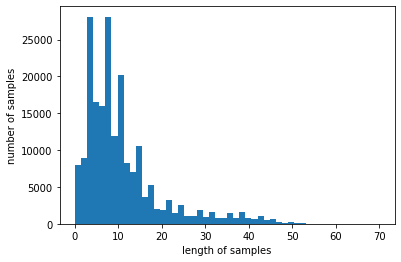

In [48]:
print('리뷰의 최대 길이 : {}'.format(max(len(l)) for l in tokenized_data))
print('리뷰의 평균 길이 : {}'.format(sum(map(len,tokenized_data)) / len(tokenized_data)))
plt.hist([len(s) for s in tokenized_data], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

### word2vec 훈련

In [49]:
model = Word2Vec(sentences=tokenized_data, size=100, window=5, min_count=5, workers=4, sg=0)

In [51]:
model.wv.vectors.shape

(17962, 100)

In [52]:
print(model.wv.most_similar('송강호'))

[('설경구', 0.8844647407531738), ('김혜수', 0.8839905858039856), ('한석규', 0.8825848698616028), ('이정재', 0.8769087195396423), ('류승범', 0.876903235912323), ('유해진', 0.8731832504272461), ('이준기', 0.8639912605285645), ('차승원', 0.863772988319397), ('최민수', 0.8634054660797119), ('디카프리오', 0.8623024225234985)]


In [53]:
print(model.wv.most_similar('봉준호'))

[('송해성', 0.9090892672538757), ('김두영', 0.9073273539543152), ('김청기', 0.9065903425216675), ('박철수', 0.9034940004348755), ('이창동', 0.9002180099487305), ('이준익', 0.8990355730056763), ('박찬욱', 0.8968294858932495), ('핀처', 0.8943756222724915), ('임권택', 0.8925238847732544), ('류승완', 0.8922854065895081)]
